## O modelo de Regressão Logística

In [ ]:
# Importa as bibliotecas a serem usadas
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

In [ ]:
# Lê os arquivos CSV
dado1= '/content/drive/My Drive/Colab Notebooks/heart_train.xlsx'
dado2= '/content/drive/My Drive/Colab Notebooks/heart_test.xlsx'
df1 = pd.read_excel(dado1, sep=',', encoding='UTF8')
df2 = pd.read_excel(dado2, sep=',', encoding='UTF8')

In [ ]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
1,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
2,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
3,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


In [ ]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,77,1,0,125,304,0,0,162,1,0.0,2,3,2
1,55,1,0,160,289,0,0,145,1,0.8,1,1,3
2,70,1,2,160,269,0,1,112,1,2.9,1,1,3
3,64,0,2,140,313,0,1,133,0,0.2,2,0,3
4,53,0,2,128,216,0,0,115,0,0.0,2,0,0


In [ ]:
  X = df1[[	'age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']]
  y = df1['target']
  

In [ ]:
# separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=27)

In [ ]:
# # treinando regresão logística:
# logreg = LogisticRegression(penalty='none', solver='newton-cg').fit(X_train, y_train)
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l2',solver='newton-cg'))])
parameters = {'logreg__C': np.linspace(10**-5,10,100)}
 
gcv=GridSearchCV(pipe, parameters, cv=3, scoring='f1', n_jobs=-1)
gcv.fit(X_train, y_train)

#Vendo o melhor valor e o escore associado
c=gcv.best_params_['logreg__C']

c, gcv.best_score_

(0.10102, 0.811328320802005)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l2', C=c, solver='newton-cg'))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=0.10102, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
# vendo pesos estimados
pipe['logreg'].intercept_[0]
pipe['logreg'].coef_[0]

array([ 0.00927771, -0.37939793,  0.40647132, -0.12942615, -0.10284378,
        0.07421423,  0.19180728,  0.45468073, -0.36542235, -0.39106756,
        0.32668038, -0.44767123, -0.38095264])

In [ ]:
# prevendo probabilidades para conjunto de teste:
y_prob = pipe.predict_proba(X_test)
y_prob = y_prob[:,1]

In [ ]:
# calculando o erro no teste
log_loss(y_test,y_prob)

0.4433054973225562

## Classificação e Métricas de Avaliação

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
np.mean(y_test==y_pred)

0.8095238095238095

Matriz de confusão:


In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)

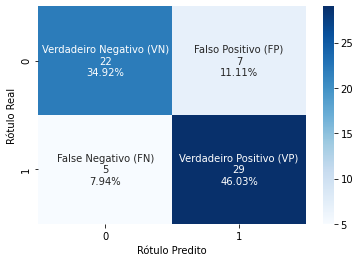

In [ ]:
group_names = ['Verdadeiro Negativo (VN)','Falso Positivo (FP)','False Negativo (FN)','Verdadeiro Positivo (VP)']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Rótulo Predito")
plt.ylabel("Rótulo Real")
plt.show()

Metricas:


In [ ]:
report=classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.81      0.85      0.83        34

    accuracy                           0.81        63
   macro avg       0.81      0.81      0.81        63
weighted avg       0.81      0.81      0.81        63



In [ ]:
prob2 = pipe.predict(df2)

In [ ]:
df2["target"] = prob2

In [ ]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
1,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
2,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
3,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
4,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
94,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
95,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
96,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


In [ ]:
df2["target"].to_csv("targetHeartAttack.csv")